# Can you make the image smile again?

In [2]:
import numpy as np
import pandas as pd
import pylab as pl

In [15]:
full_df = pd.read_csv('./dataset/full.csv')
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

# Here is the original image

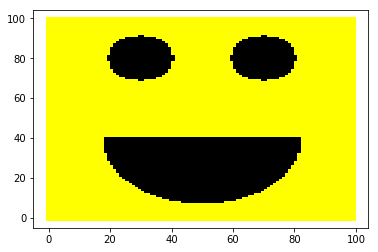

In [5]:
for color in ['yellow', 'black']:
    pl.scatter(full_df[full_df.color==color].x, full_df[full_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# But I've lost some data from the image :(

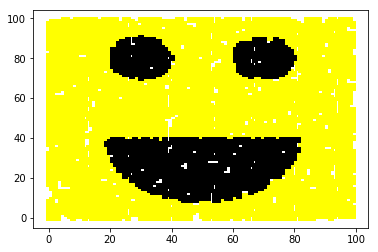

In [4]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# Can you help me recover my original image?

In [12]:
# hint: what kind of problem is this? regression/classification/clustering
print train_df.color.value_counts()


yellow    3917
black     1083
Name: color, dtype: int64


In [25]:
# convert y values to numerical
my_map = {"yellow":0, "black": 1}
train_df['num_color'] = train_df['color'].map(my_map)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

my_model = KNeighborsClassifier(n_neighbors = 8, weights = 'distance')

In [27]:
X = train_df[['x','y']] # need it as df
y = train_df['num_color'] # need it as vector

my_model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')

In [28]:
# find accuracy of prediction
my_model.score(X,y)

1.0

1.0


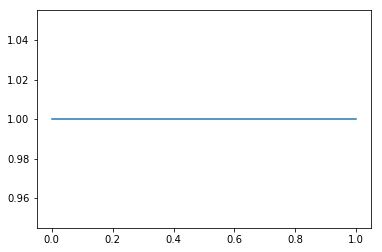

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score

probas =  my_model.predict_proba(X)
plt.plot(roc_curve(train_df[['num_color']],probas[:,1])[0], roc_curve(train_df[['num_color']],probas[:,1])[1])
print roc_auc_score(train_df['num_color'], probas[:,1])

In [16]:
# predict X of test_df

X_predict = test_df[['x', 'y']]
num_color_predict = my_model.predict(X_predict)

In [30]:
test_df['num_color'] = num_color_predict
test_df['color'] = test_df.num_color.map({0:"yellow", 1:"black"})

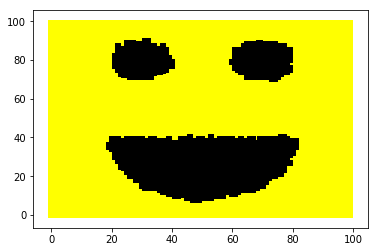

In [32]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')

for color in ['yellow', 'black']:
    pl.scatter(test_df[test_df.color==color].x, test_df[test_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

In [55]:
# cross validation model
from sklearn import cross_validation
import numpy as np

kf = cross_validation.KFold(len(train_df), n_folds = 5, shuffle = True)
roc = []
n = 0
acc_scores = []


print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = KNeighborsClassifier(n_neighbors = 8, weights = 'distance').fit(X.iloc[train_index], y.iloc[train_index])
    probas = lm.predict_proba(X.iloc[test_index]) ## you want to predict on test
    roc.append(roc_auc_score(train_df['num_color'].iloc[test_index], probas[:,1]))
    acc_scores.append(lm.score(X.iloc[test_index], y.iloc[test_index]))
    n+=1
    print 'Model', n
    print 'ROC', roc[n-1]
    print 'acc_scores', acc_scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of ROC for all folds:', np.mean(roc)
print 'Mean of acc_scores for all folds:', np.mean(acc_scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
ROC 0.998740824393
acc_scores 0.981
Model 2
ROC 0.999319552312
acc_scores 0.989
Model 3
ROC 0.999095522533
acc_scores 0.986
Model 4
ROC 0.999258899002
acc_scores 0.986
Model 5
ROC 0.999002914557
acc_scores 0.984
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of ROC for all folds: 0.99908354256
Mean of acc_scores for all folds: 0.9852
